Documentation:

- https://spark.apache.org/docs/latest/api/python/index.html
- https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql.html

### Explore the COVID data

In [0]:
# Check out the pre-loaded dataset
#display(dbutils.fs.ls('dbfs:/databricks-datasets/COVID/covid-19-data/'))
display(dbutils.fs.ls('dbfs:/databricks-datasets/COVID/covid-19-data/'))

path name size modificationTime dbfs:/databricks-datasets/COVID/covid-19-data/.git/ .git/ 0 0 dbfs:/databricks-datasets/COVID/covid-19-data/.github/ .github/ 0 0 dbfs:/databricks-datasets/COVID/covid-19-data/.gitignore .gitignore 10 1615898767000 dbfs:/databricks-datasets/COVID/covid-19-data/LICENSE LICENSE 1289 1615898767000 dbfs:/databricks-datasets/COVID/covid-19-data/NEW-YORK-DEATHS-METHODOLOGY.md NEW-YORK-DEATHS-METHODOLOGY.md 2771 1615898767000 dbfs:/databricks-datasets/COVID/covid-19-data/NYT-readme.md NYT-readme.md 1748 1586273566000 dbfs:/databricks-datasets/COVID/covid-19-data/PROBABLE-CASES-NOTE.md PROBABLE-CASES-NOTE.md 3162 1615898767000 dbfs:/databricks-datasets/COVID/covid-19-data/README.md README.md 22959 1615898767000 dbfs:/databricks-datasets/COVID/covid-19-data/colleges/ colleges/ 0 0 dbfs:/databricks-datasets/COVID/covid-19-data/excess-deaths/ excess-deaths/ 0 0 dbfs:/databricks-datasets/COVID/covid-19-data/live/ live/ 0 0 dbfs:/databricks-datasets/COVID/covid-19-data/mask-use/ mask-use/ 0 0 dbfs:/databricks-datasets/COVID/covid-19-data/us-counties-recent.csv us-counties-recent.csv 3977154 1615898768000 dbfs:/databricks-datasets/COVID/covid-19-data/us-counties.csv us-counties.csv 45452100 1615898768000 dbfs:/databricks-datasets/COVID/covid-19-data/us-states.csv us-states.csv 703102 1615898768000 dbfs:/databricks-datasets/COVID/covid-19-data/us.csv us.csv 10269 1615898768000

In [0]:
# Display and read README file
spark.read.text('dbfs:/databricks-datasets/COVID/covid-19-data/README.md').display()

value # Coronavirus (Covid-19) Data in the United States **NEW:** As the [us-counties.csv](us-counties.csv) file has grown too large to open in Excel, we're providing a new [us-counties-recent.csv](us-counties-recent.csv) file that contains only the most recent 30 days of data for each county. It is otherwise identical. Both files will continue to be updated. **Change:** As of Feb. 10, 2021, we are changing how we report data for a few low-population Alaska geographies to better align with how the state reports data. Data for Bristol Bay Borough and Lake and Peninsula Borough are combined in a new area called "Bristol Bay plus Lake and Peninsula", and data for Yakutat City and Borough and Hoonah-Angoon Census Area are combined as "Yakutat plus Hoonah-Angoon". Many cases now assigned to those new geographies were previously reported as Unknown. The entire timeseries will be revised to use these new geographies. **NEW:** We are publishing the data behind our [survey of mask usage](https://www.nytimes.com/interactive/2020/07/17/upshot/coronavirus-face-mask-map.html) in the United States in order to provide researchers a way to understand the role of mask wearing in the course of the pandemic. See the data and documentation in the [mask-use/](mask-use/) directory. **NEW:** We are publishing the data behind our [excess deaths tracker](https://www.nytimes.com/interactive/2020/04/21/world/coronavirus-missing-deaths.html) in order to provide researchers and the public with a better record of the true toll of the pandemic. This data is compiled from official national and municipal data for 24 countries. See the data and documentation in the [excess-deaths/](excess-deaths/) directory. --- [ [U.S. Data](us.csv) ([Raw CSV](https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv)) | [U.S. State-Level Data](us-states.csv) ([Raw CSV](https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv)) | [U.S. County-Level Data](us-counties.csv) ([Raw CSV](https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv)) ] The New York Times is releasing a series of data files with cumulative counts of coronavirus cases in the United States, at the state and county level, over time. We are compiling this time series data from state and local governments and health departments in an attempt to provide a complete record of the ongoing outbreak. Since late January, The Times has tracked cases of coronavirus in real time as they were identified after testing. Because of the widespread shortage of testing, however, the data is necessarily limited in the picture it presents of the outbreak. We have used this data to power our [maps](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html) and [reporting](https://www.nytimes.com/coronavirus) tracking the outbreak, and it is now being made available to the public in response to requests from researchers, scientists and government officials who would like access to the data to better understand the outbreak. The data begins with the first reported coronavirus case in Washington State on Jan. 21, 2020. We will publish regular updates to the data in this repository. ## Live and Historical Data We are providing two sets of data with cumulative counts of coronavirus cases and deaths: one with our most current numbers for each geography and another with historical data showing the tally for each day for each geography. The historical data files are at the top level of the directory and contain data up to, but not including the current day. The live data files are in the [live/](live/) directory. A key difference between the historical and live files is that the numbers in the historical files are the final counts at the end of each day, while the live files have figures that may be a partial count released during the day but cannot necessarily be considered the final, end-of-day tally. The historical and live data are released in three files, one for eac

Open `us-states.csv` and explore the schema

In [0]:
states = (spark.read.format('csv')
            .option("header", "true")
            .option("InferSchema", "true")
            .load('dbfs:/databricks-datasets/COVID/covid-19-data/us-states.csv'))

# Display the dataframe
states.display()

date state fips cases deaths 2020-01-21 Washington 53 1 0 2020-01-22 Washington 53 1 0 2020-01-23 Washington 53 1 0 2020-01-24 Illinois 17 1 0 2020-01-24 Washington 53 1 0 2020-01-25 California 6 1 0 2020-01-25 Illinois 17 1 0 2020-01-25 Washington 53 1 0 2020-01-26 Arizona 4 1 0 2020-01-26 California 6 2 0 2020-01-26 Illinois 17 1 0 2020-01-26 Washington 53 1 0 2020-01-27 Arizona 4 1 0 2020-01-27 California 6 2 0 2020-01-27 Illinois 17 1 0 2020-01-27 Washington 53 1 0 2020-01-28 Arizona 4 1 0 2020-01-28 California 6 2 0 2020-01-28 Illinois 17 1 0 2020-01-28 Washington 53 1 0 2020-01-29 Arizona 4 1 0 2020-01-29 California 6 2 0 2020-01-29 Illinois 17 1 0 2020-01-29 Washington 53 1 0 2020-01-30 Arizona 4 1 0 2020-01-30 California 6 2 0 2020-01-30 Illinois 17 2 0 2020-01-30 Washington 53 1 0 2020-01-31 Arizona 4 1 0 2020-01-31 California 6 3 0 2020-01-31 Illinois 17 2 0 2020-01-31 Washington 53 1 0 2020-02-01 Arizona 4 1 0 2020-02-01 California 6 3 0 2020-02-01 Illinois 17 2 0 2020-02-01 Massachusetts 25 1 0 2020-02-01 Washington 53 1 0 2020-02-02 Arizona 4 1 0 2020-02-02 California 6 6 0 2020-02-02 Illinois 17 2 0 2020-02-02 Massachusetts 25 1 0 2020-02-02 Washington 53 1 0 2020-02-03 Arizona 4 1 0 2020-02-03 California 6 6 0 2020-02-03 Illinois 17 2 0 2020-02-03 Massachusetts 25 1 0 2020-02-03 Washington 53 1 0 2020-02-04 Arizona 4 1 0 2020-02-04 California 6 6 0 2020-02-04 Illinois 17 2 0 2020-02-04 Massachusetts 25 1 0 2020-02-04 Washington 53 1 0 2020-02-05 Arizona 4 1 0 2020-02-05 California 6 6 0 2020-02-05 Illinois 17 2 0 2020-02-05 Massachusetts 25 1 0 2020-02-05 Washington 53 1 0 2020-02-05 Wisconsin 55 1 0 2020-02-06 Arizona 4 1 0 2020-02-06 California 6 6 0 2020-02-06 Illinois 17 2 0 2020-02-06 Massachusetts 25 1 0 2020-02-06 Washington 53 1 0 2020-02-06 Wisconsin 55 1 0 2020-02-07 Arizona 4 1 0 2020-02-07 California 6 6 0 2020-02-07 Illinois 17 2 0 2020-02-07 Massachusetts 25 1 0 2020-02-07 Washington 53 1 0 2020-02-07 Wisconsin 55 1 0 2020-02-08 Arizona 4 1 0 2020-02-08 California 6 6 0 2020-02-08 Illinois 17 2 0 2020-02-08 Massachusetts 25 1 0 2020-02-08 Washington 53 1 0 2020-02-08 Wisconsin 55 1 0 2020-02-09 Arizona 4 1 0 2020-02-09 California 6 6 0 2020-02-09 Illinois 17 2 0 2020-02-09 Massachusetts 25 1 0 2020-02-09 Washington 53 1 0 2020-02-09 Wisconsin 55 1 0 2020-02-10 Arizona 4 1 0 2020-02-10 California 6 7 0 2020-02-10 Illinois 17 2 0 2020-02-10 Massachusetts 25 1 0 2020-02-10 Washington 53 1 0 2020-02-10 Wisconsin 55 1 0 2020-02-11 Arizona 4 1 0 2020-02-11 California 6 7 0 2020-02-11 Illinois 17 2 0 2020-02-11 Massachusetts 25 1 0 2020-02-11 Washington 53 1 0 2020-02-11 Wisconsin 55 1 0 2020-02-12 Arizona 4 1 0 2020-02-12 California 6 7 0 2020-02-12 Illinois 17 2 0 2020-02-12 Massachusetts 25 1 0 2020-02-12 Texas 48 1 0 2020-02-12 Washington 53 1 0 2020-02-12 Wisconsin 55 1 0 2020-02-13 Arizona 4 1 0 2020-02-13 California 6 7 0 2020-02-13 Illinois 17 2 0 2020-02-13 Massachusetts 25 1 0 2020-02-13 Texas 48 2 0 2020-02-13 Washington 53 1 0 2020-02-13 Wisconsin 55 1 0 2020-02-14 Arizona 4 1 0 2020-02-14 California 6 7 0 2020-02-14 Illinois 17 2 0 2020-02-14 Massachusetts 25 1 0 2020-02-14 Texas 48 2 0 2020-02-14 Washington 53 1 0 2020-02-14 Wisconsin 55 1 0 2020-02-15 Arizona 4 1 0 2020-02-15 California 6 7 0 2020-02-15 Illinois 17 2 0 2020-02-15 Massachusetts 25 1 0 2020-02-15 Texas 48 2 0 2020-02-15 Washington 53 1 0 2020-02-15 Wisconsin 55 1 0 2020-02-16 Arizona 4 1 0 2020-02-16 California 6 7 0 2020-02-16 Illinois 17 2 0 2020-02-16 Massachusetts 25 1 0 2020-02-16 Texas 48 2 0 2020-02-16 Washington 53 1 0 2020-02-16 Wisconsin 55 1 0 2020-02-17 Arizona 4 1 0 2020-02-17 California 6 7 0 2020-02-17 Illinois 17 2 0 2020-02-17 Massachusetts 25 1 0 2020-02-17 Nebraska 31 10 0 2020-02-17 Texas 48 2 0 2020-02-17 Washington 53 1 0 2020-02-17 Wisconsin 55 1 0 2020-02-18 Arizona 4 1 0 2020-02-18 California 6 7 0 2020-02-18 Illinois 17 2 0 2020-02-18 Massachusetts 25 1 0 2020-02-18 Nebraska 31 10 0 2020-02-18 Texas 

In [0]:
# Print schema (in this case it was inferred on the read)
states.printSchema()

root
 |-- date: date (nullable = true)
 |-- state: string (nullable = true)
 |-- fips: integer (nullable = true)
 |-- cases: integer (nullable = true)
 |-- deaths: integer (nullable = true)



Explore the `us-counties.csv` and answer the following questions:
1. What's the time span of the data (first and last date)?
2. Agregate the table by state:
  - Which state has the most confirmed cases and confirmed deaths?
  - Make a plot (using built-in [databricks functionality](https://docs.databricks.com/en/visualizations/index.html)).

In [0]:
# Read the us-counties.csv file and infer schema
counties = (spark.read.format('csv')
            .option("header", "true")
            .option("InferSchema", "true")
            .load('dbfs:/databricks-datasets/COVID/covid-19-data/live/us-counties.csv'))
counties.display()

date county state fips cases deaths confirmed_cases confirmed_deaths probable_cases probable_deaths 2021-03-12 Autauga Alabama 1001 6409 95 5523 85 886 10 2021-03-12 Baldwin Alabama 1003 20072 294 14228 220 5844 74 2021-03-12 Barbour Alabama 1005 2175 52 1217 35 958 17 2021-03-12 Bibb Alabama 1007 2475 58 2009 34 466 24 2021-03-12 Blount Alabama 1009 6282 129 4835 109 1447 20 2021-03-12 Bullock Alabama 1011 1183 39 1057 29 126 10 2021-03-12 Butler Alabama 1013 2037 66 1858 60 179 6 2021-03-12 Calhoun Alabama 1015 14034 299 10551 240 3483 59 2021-03-12 Chambers Alabama 1017 3439 112 1711 72 1728 40 2021-03-12 Cherokee Alabama 1019 1787 42 1152 32 635 10 2021-03-12 Chilton Alabama 1021 3945 105 3272 79 673 26 2021-03-12 Choctaw Alabama 1023 569 23 493 13 76 10 2021-03-12 Clarke Alabama 1025 3460 55 2438 40 1022 15 2021-03-12 Clay Alabama 1027 1467 54 1163 48 304 6 2021-03-12 Cleburne Alabama 1029 1410 41 1270 33 140 8 2021-03-12 Coffee Alabama 1031 5286 104 3484 44 1802 60 2021-03-12 Colbert Alabama 1033 6027 125 4355 105 1672 20 2021-03-12 Conecuh Alabama 1035 1074 24 814 23 260 1 2021-03-12 Coosa Alabama 1037 911 24 540 21 371 3 2021-03-12 Covington Alabama 1039 4007 108 1971 73 2036 35 2021-03-12 Crenshaw Alabama 1041 1484 55 1093 47 391 8 2021-03-12 Cullman Alabama 1043 9054 183 6205 120 2849 63 2021-03-12 Dale Alabama 1045 4701 108 3121 86 1580 22 2021-03-12 Dallas Alabama 1047 3443 142 2607 99 836 43 2021-03-12 DeKalb Alabama 1049 8555 178 7364 147 1191 31 2021-03-12 Elmore Alabama 1051 9625 194 7127 157 2498 37 2021-03-12 Escambia Alabama 1053 3807 73 2231 53 1576 20 2021-03-12 Etowah Alabama 1055 13470 335 10655 274 2815 61 2021-03-12 Fayette Alabama 1057 2032 58 1648 42 384 16 2021-03-12 Franklin Alabama 1059 4048 82 3384 68 664 14 2021-03-12 Geneva Alabama 1061 2415 71 1518 35 897 36 2021-03-12 Greene Alabama 1063 887 32 744 24 143 8 2021-03-12 Hale Alabama 1065 2130 72 1629 60 501 12 2021-03-12 Henry Alabama 1067 1840 41 1050 25 790 16 2021-03-12 Houston Alabama 1069 10189 266 5491 161 4698 105 2021-03-12 Jackson Alabama 1071 6570 105 5536 78 1034 27 2021-03-12 Jefferson Alabama 1073 72571 1418 65389 1139 7182 279 2021-03-12 Lamar Alabama 1075 1349 33 1089 25 260 8 2021-03-12 Lauderdale Alabama 1077 8670 215 5687 176 2983 39 2021-03-12 Lawrence Alabama 1079 2870 92 2351 79 519 13 2021-03-12 Lee Alabama 1081 15122 162 8465 100 6657 62 2021-03-12 Limestone Alabama 1083 9476 142 8097 119 1379 23 2021-03-12 Lowndes Alabama 1085 1338 52 1234 47 104 5 2021-03-12 Macon Alabama 1087 1486 45 1176 35 310 10 2021-03-12 Madison Alabama 1089 32850 479 28627 372 4223 107 2021-03-12 Marengo Alabama 1091 2464 59 2237 42 227 17 2021-03-12 Marion Alabama 1093 2945 98 2367 86 578 12 2021-03-12 Marshall Alabama 1095 11491 216 9985 164 1506 52 2021-03-12 Mobile Alabama 1097 36629 752 27094 698 9535 54 2021-03-12 Monroe Alabama 1099 1673 39 991 30 682 9 2021-03-12 Montgomery Alabama 1101 22951 536 20840 455 2111 81 2021-03-12 Morgan Alabama 1103 13855 258 11611 218 2244 40 2021-03-12 Perry Alabama 1105 1071 27 918 24 153 3 2021-03-12 Pickens Alabama 1107 2270 57 1697 40 573 17 2021-03-12 Pike Alabama 1109 2948 74 1643 32 1305 42 2021-03-12 Randolph Alabama 1111 1671 41 1245 27 426 14 2021-03-12 Russell Alabama 1113 4110 34 3173 24 937 10 2021-03-12 Shelby Alabama 1117 22465 226 19607 175 2858 51 2021-03-12 St. Clair Alabama 1115 9123 230 7663 196 1460 34 2021-03-12 Sumter Alabama 1119 1013 31 926 27 87 4 2021-03-12 Talladega Alabama 1121 7698 167 5404 134 2294 33 2021-03-12 Tallapoosa Alabama 1123 3668 143 2715 126 953 17 2021-03-12 Tuscaloosa Alabama 1125 24529 430 16434 295 8095 135 2021-03-12 Walker Alabama 1127 6679 267 5672 228 1007 39 2021-03-12 Washington Alabama 1129 1580 38 1129 30 451 8 2021-03-12 Wilcox Alabama 1131 1245 26 986 23 259 3 2021-03-12 Winston Alabama 1133 2602 68 2231 58 371 10 2021-03-12 Aleutians East Borough Alaska 2013 362 2 null 2 null null 2021-03-12 Aleutians West Census Area Alaska 2016 641 0 null 0 null nul

In [0]:
# Check the schema. What type is the date column?
counties.printSchema()

root
 |-- date: date (nullable = true)
 |-- county: string (nullable = true)
 |-- state: string (nullable = true)
 |-- fips: integer (nullable = true)
 |-- cases: integer (nullable = true)
 |-- deaths: integer (nullable = true)
 |-- confirmed_cases: integer (nullable = true)
 |-- confirmed_deaths: integer (nullable = true)
 |-- probable_cases: integer (nullable = true)
 |-- probable_deaths: integer (nullable = true)



In [0]:
# If 'date' is other than date type, convert `date` to date type, else, provide the code that would be needed to convert
# the datatype. 

from pyspark.sql.functions import col, to_date

# Convert 'date' column to DateType using `to_date` function if it's not already DateType
if counties.schema['date'].dataType != 'DateType':
    counties = counties.withColumn('date', to_date(col('date'), 'yyyy-MM-dd'))

counties.printSchema()


root
 |-- date: date (nullable = true)
 |-- county: string (nullable = true)
 |-- state: string (nullable = true)
 |-- fips: integer (nullable = true)
 |-- cases: integer (nullable = true)
 |-- deaths: integer (nullable = true)
 |-- confirmed_cases: integer (nullable = true)
 |-- confirmed_deaths: integer (nullable = true)
 |-- probable_cases: integer (nullable = true)
 |-- probable_deaths: integer (nullable = true)



In [0]:
# First day in the dataset
#Sort the data by the 'date' column in ascending order
first_day = counties.orderBy('date').first()


#Extract the date value from the first row
first_day_value = first_day['date']


# Show the first day in the dataset
print(f"The first day in the dataset is: {first_day_value}")



The first day in the dataset is: 2021-03-12


In [0]:
# Last day in the dataset 
# Sort the data by the 'date' column in descending order
last_day = counties.orderBy('date', ascending=False).first()

#Extract the date value from the first row (most recent date)
last_day_value = last_day['date']

# Show the last day 
print(f"The last day in the dataset is: {last_day_value}")


The last day in the dataset is: 2021-03-12


In [0]:
# Aggregate confirmed cases and confirmed deaths per state
from pyspark.sql import functions as F

from pyspark.sql import functions as F

# Group by 'state' and aggregate the 'confirmed_cases' and 'confirmed_deaths' columns
state_aggregates = counties.groupBy('state').agg(
    F.sum('confirmed_cases').alias('total_confirmed_cases'),
    F.sum('confirmed_deaths').alias('total_confirmed_deaths')
)

# Show the aggregated result
state_aggregates.show()



+--------------------+---------------------+----------------------+
|               state|total_confirmed_cases|total_confirmed_deaths|
+--------------------+---------------------+----------------------+
|                Utah|                85210|                   655|
|              Hawaii|                 null|                  null|
|           Minnesota|               469579|                  null|
|                Ohio|                 null|                  null|
|Northern Mariana ...|                  146|                     2|
|            Arkansas|               256864|                  4352|
|              Oregon|                10738|                   138|
|               Texas|              2370468|                 29319|
|        North Dakota|                95186|                  null|
|        Pennsylvania|               834207|                  8012|
|         Connecticut|               270354|                  6384|
|            Nebraska|                68336|    

In [0]:
# Which state has the max confirmed cases?
from pyspark.sql import functions as F

# Step 1: Group by 'state' and aggregate the 'confirmed_cases'
state_aggregates = counties.groupBy('state').agg(
    F.sum('confirmed_cases').alias('total_confirmed_cases')
)

# Step 2: Sort the data by total confirmed cases in descending order
max_confirmed_state = state_aggregates.orderBy('total_confirmed_cases', ascending=False).first()

# Step 3: Display the state with the maximum confirmed cases
max_state = max_confirmed_state['state']
max_cases = max_confirmed_state['total_confirmed_cases']

print(f"The state with the maximum confirmed cases is {max_state} with {max_cases} confirmed cases.")


The state with the maximum confirmed cases is California with 3595199 confirmed cases.


In [0]:
# Which state has the max confirmed deaths?

from pyspark.sql import functions as F

# Step 1: Group by 'state' and aggregate the 'confirmed_deaths'
state_aggregates_deaths = counties.groupBy('state').agg(
    F.sum('confirmed_deaths').alias('total_confirmed_deaths')
)

# Step 2: Sort the data by total confirmed deaths in descending order
max_deaths_state = state_aggregates_deaths.orderBy('total_confirmed_deaths', ascending=False).first()

# Step 3: Display the state with the maximum confirmed deaths
max_deaths_state_name = max_deaths_state['state']
max_deaths = max_deaths_state['total_confirmed_deaths']

print(f"The state with the maximum confirmed deaths is {max_deaths_state_name} with {max_deaths} confirmed deaths.")


The state with the maximum confirmed deaths is California with 55314 confirmed deaths.


In [0]:
# Do we have the data for all the states?
# Step 1: Get the distinct list of states in the dataset
distinct_states = counties.select('state').distinct().collect()

# Step 2: Define the expected set of U.S. states (list of 50 states)
expected_states = set([
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
    'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
    'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
    'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
    'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
    'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
])

# Step 3: Get the set of states from the dataset
states_in_data = set([row['state'] for row in distinct_states])

# Step 4: Check if all states are present
missing_states = expected_states - states_in_data

# Step 5: Print the result
if missing_states:
    print(f"The following states are missing from the dataset: {', '.join(missing_states)}")
else:
    print("Data is available for all 50 states.")


Data is available for all 50 states.


In [0]:
# How many counties is in each state?
# Step 1: Group by 'state' and count distinct counties within each state
counties_per_state = counties.groupBy('state').agg(
    F.countDistinct('county').alias('county_count')
)

# Step 2: Show the result
counties_per_state.show()


+--------------------+------------+
|               state|county_count|
+--------------------+------------+
|                Utah|          30|
|              Hawaii|           5|
|           Minnesota|          88|
|                Ohio|          89|
|Northern Mariana ...|           2|
|              Oregon|          36|
|            Arkansas|          76|
|               Texas|         254|
|        North Dakota|          54|
|        Pennsylvania|          67|
|         Connecticut|           9|
|            Nebraska|          93|
|             Vermont|          15|
|              Nevada|          17|
|         Puerto Rico|          79|
|          Washington|          39|
|            Illinois|         103|
|            Oklahoma|          78|
|      Virgin Islands|           3|
|District of Columbia|           1|
+--------------------+------------+
only showing top 20 rows



Get familiar with the mask use study by reading the README.md

In [0]:
# Read the README file
spark.read.text('dbfs:/databricks-datasets/COVID/covid-19-data/mask-use/README.md').display()

value # Mask-Wearing Survey Data The New York Times is releasing estimates of [mask usage](https://www.nytimes.com/interactive/2020/07/17/upshot/coronavirus-face-mask-map.html) by county in the United States. This data comes from a large number of interviews conducted online by the global data and survey firm Dynata at the request of The New York Times. The firm asked a question about mask use to obtain 250,000 survey responses between July 2 and July 14, enough data to provide estimates more detailed than the state level. (Several states have imposed new mask requirements since the completion of these interviews.) Specifically, each participant was asked: _How often do you wear a mask in public when you expect to be within six feet of another person?_ This survey was conducted a single time, and at this point we have no plans to update the data or conduct the survey again. ## Data Data on the estimated prevalence of mask-wearing in counties in the United States can be found in the **[mask-use-by-county.csv](mask-use-by-county.csv)** file. ([Raw CSV](https://raw.githubusercontent.com/nytimes/covid-19-data/master/mask-use/mask-use-by-county.csv)) ``` COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS 01001,0.053,0.074,0.134,0.295,0.444 01003,0.083,0.059,0.098,0.323,0.436 01005,0.067,0.121,0.12,0.201,0.491 ``` The fields have the following definitions: **COUNTYFP**: The county FIPS code. **NEVER**: The estimated share of people in this county who would say **never** in response to the question “How often do you wear a mask in public when you expect to be within six feet of another person?” **RARELY**: The estimated share of people in this county who would say **rarely** **SOMETIMES**: The estimated share of people in this county who would say **sometimes** **FREQUENTLY**: The estimated share of people in this county who would say **frequently** **ALWAYS**: The estimated share of people in this county who would say **always** ## Methodology To transform raw survey responses into county-level estimates, the survey data was weighted by age and gender, and survey respondents’ locations were approximated from their ZIP codes. Then estimates of mask-wearing were made for each census tract by taking a weighted average of the 200 nearest responses, with closer responses getting more weight in the average. These tract-level estimates were then rolled up to the county level according to each tract’s total population. By rolling the estimates up to counties, it reduces a lot of the random noise that is seen at the tract level. In addition, the shapes in the map are constructed from census tracts that have been merged together — this helps in displaying a detailed map, but is less useful than county-level in analyzing the data. ## License and Attribution This data is licensed under the same terms as our Coronavirus Data in the United States data. In general, we are making this data publicly available for broad, noncommercial public use including by medical and public health researchers, policymakers, analysts and local news media. If you use this data, you must attribute it to “The New York Times and Dynata” in any publication. If you would like a more expanded description of the data, you could say “Estimates from The New York Times, based on roughly 250,000 interviews conducted by Dynata from July 2 to July 14.” If you use it in an online presentation, we would appreciate it if you would link to our graphic discussing these results [https://www.nytimes.com/interactive/2020/07/17/upshot/coronavirus-face-mask-map.html](https://www.nytimes.com/interactive/2020/07/17/upshot/coronavirus-face-mask-map.html). If you use this data, please let us know at covid-data@nytimes.com. See our [LICENSE](https://github.com/nytimes/covid-19-data/blob/master/LICENSE) for the full terms of use for this data. ## Contact Us If you have questions about the data or licensing conditions, please contact us at: covid-data@nytimes.com ## Contributors Josh Katz, Margot

In [0]:
# create dataframe masks by reading dbfs:/databricks-datasets/COVID/covid-19-data/mask-use/mask-use-by-county.csv
# Read the CSV file into a DataFrame
# Read the CSV file into a DataFrame
masks = spark.read.format('csv') \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load('dbfs:/databricks-datasets/COVID/covid-19-data/mask-use/mask-use-by-county.csv')

# Show the DataFrame
masks.display()


COUNTYFP NEVER RARELY SOMETIMES FREQUENTLY ALWAYS 1001 0.053 0.074 0.134 0.295 0.444 1003 0.083 0.059 0.098 0.323 0.436 1005 0.067 0.121 0.12 0.201 0.491 1007 0.02 0.034 0.096 0.278 0.572 1009 0.053 0.114 0.18 0.194 0.459 1011 0.031 0.04 0.144 0.286 0.5 1013 0.102 0.053 0.257 0.137 0.451 1015 0.152 0.108 0.13 0.167 0.442 1017 0.117 0.037 0.15 0.136 0.56 1019 0.135 0.027 0.161 0.158 0.52 1021 0.06 0.07 0.058 0.194 0.618 1023 0.049 0.038 0.126 0.219 0.568 1025 0.049 0.088 0.164 0.268 0.43 1027 0.148 0.158 0.195 0.169 0.329 1029 0.151 0.125 0.138 0.217 0.368 1031 0.101 0.152 0.094 0.186 0.466 1033 0.082 0.096 0.152 0.159 0.51 1035 0.099 0.052 0.259 0.192 0.399 1037 0.055 0.131 0.167 0.263 0.384 1039 0.187 0.128 0.129 0.201 0.356 1041 0.06 0.091 0.199 0.233 0.416 1043 0.13 0.024 0.249 0.217 0.379 1045 0.089 0.113 0.118 0.22 0.46 1047 0.095 0.1 0.159 0.122 0.524 1049 0.084 0.051 0.106 0.179 0.58 1051 0.042 0.095 0.127 0.252 0.485 1053 0.114 0.026 0.188 0.285 0.387 1055 0.096 0.103 0.178 0.122 0.501 1057 0.138 0.048 0.151 0.233 0.429 1059 0.065 0.071 0.223 0.156 0.484 1061 0.176 0.131 0.089 0.158 0.445 1063 0.03 0.053 0.127 0.167 0.623 1065 0.026 0.061 0.084 0.191 0.639 1067 0.066 0.068 0.17 0.258 0.438 1069 0.085 0.079 0.135 0.268 0.433 1071 0.092 0.089 0.11 0.249 0.46 1073 0.049 0.037 0.107 0.179 0.628 1075 0.107 0.045 0.132 0.189 0.527 1077 0.093 0.119 0.141 0.179 0.469 1079 0.162 0.08 0.088 0.251 0.419 1081 0.053 0.064 0.138 0.183 0.562 1083 0.102 0.034 0.133 0.336 0.395 1085 0.12 0.073 0.145 0.199 0.464 1087 0.008 0.033 0.241 0.172 0.545 1089 0.062 0.05 0.123 0.177 0.589 1091 0.033 0.151 0.118 0.186 0.512 1093 0.129 0.064 0.246 0.207 0.353 1095 0.075 0.064 0.129 0.253 0.479 1097 0.077 0.07 0.102 0.244 0.506 1099 0.112 0.041 0.182 0.288 0.378 1101 0.056 0.095 0.123 0.212 0.513 1103 0.078 0.077 0.082 0.304 0.459 1105 0.025 0.084 0.087 0.187 0.618 1107 0.031 0.06 0.169 0.157 0.584 1109 0.06 0.131 0.145 0.333 0.33 1111 0.158 0.226 0.105 0.144 0.368 1113 0.069 0.067 0.08 0.213 0.57 1115 0.027 0.134 0.144 0.2 0.495 1117 0.022 0.075 0.118 0.24 0.545 1119 0.055 0.068 0.118 0.197 0.562 1121 0.113 0.15 0.208 0.169 0.361 1123 0.067 0.095 0.136 0.296 0.406 1125 0.041 0.036 0.144 0.247 0.532 1127 0.09 0.081 0.145 0.256 0.429 1129 0.018 0.077 0.102 0.307 0.495 1131 0.061 0.098 0.199 0.187 0.455 1133 0.13 0.046 0.328 0.183 0.312 2013 0.067 0.032 0.034 0.316 0.551 2016 0.078 0.031 0.03 0.337 0.524 2020 0.042 0.05 0.049 0.196 0.663 2050 0.101 0.022 0.014 0.45 0.413 2060 0.048 0.037 0.042 0.308 0.564 2068 0.062 0.081 0.067 0.225 0.565 2070 0.072 0.025 0.027 0.391 0.484 2090 0.094 0.084 0.175 0.234 0.413 2100 0.055 0.05 0.123 0.419 0.352 2105 0.051 0.064 0.13 0.399 0.356 2110 0.051 0.067 0.133 0.396 0.353 2122 0.043 0.047 0.051 0.197 0.662 2130 0.025 0.149 0.174 0.256 0.396 2150 0.042 0.043 0.049 0.233 0.633 2158 0.103 0.022 0.007 0.521 0.347 2164 0.055 0.036 0.04 0.299 0.571 2170 0.042 0.051 0.048 0.198 0.66 2180 0.086 0.061 0.009 0.544 0.3 2185 0.036 0.059 0.235 0.215 0.455 2188 0.035 0.188 0.051 0.474 0.252 2195 0.042 0.095 0.148 0.349 0.365 2198 0.033 0.125 0.161 0.3 0.38 2220 0.048 0.077 0.137 0.381 0.357 2230 0.058 0.038 0.116 0.435 0.354 2240 0.064 0.071 0.14 0.272 0.453 2261 0.04 0.049 0.052 0.197 0.663 2275 0.035 0.119 0.16 0.312 0.374 2282 0.047 0.012 0.078 0.381 0.481 2290 0.044 0.047 0.126 0.425 0.358 4001 0.055 0.063 0.031 0.15 0.701 4003 0.053 0.025 0.147 0.194 0.581 4005 0.039 0.08 0.07 0.11 0.702 4007 0.073 0.014 0.03 0.336 0.547 4009 0.095 0.067 0.237 0.049 0.553 4011 0.111 0.089 0.167 0.089 0.544 4012 0.031 0.064 0.162 0.173 0.57 4013 0.023 0.025 0.059 0.158 0.734 4015 0.051 0.096 0.104 0.164 0.585 4017 0.091 0.108 0.059 0.139 0.602 4019 0.023 0.024 0.073 0.121 0.759 4021 0.033 0.055 0.096 0.148 0.667 4023 0.028 0.002 0.058 0.074 0.837 4025 0.031 0.073 0.081 0.176 0.639 4027 0.008 0.013 0.046 0.129 0.804 5001 0.019 0.073 0.134 0.216 0.557 5003 0.023 0.103 0.163 0.117 0.595 5005 0.15 0.104 0.108 0.104 0.534 5007 0.081 0.034 0.083

In [0]:
# Make two groups of frequency of wearing masks: almost_never (NEVER+RARELY) and almost_always (FREQUENTLY+ALWAYS): masks_groups
from pyspark.sql.functions import when, col

# Create the 'masks_groups' column based on the given columns
masks_groups = masks.withColumn(
    'masks_groups',
    when(
        (col('NEVER') > 0) | (col('RARELY') > 0), 'almost_never'
    ).when(
        (col('FREQUENTLY') > 0) | (col('ALWAYS') > 0), 'almost_always'
    ).otherwise('Other')  # In case there are any other categories
)

# Show the DataFrame with the new 'masks_groups' column
masks_groups.display()


COUNTYFP NEVER RARELY SOMETIMES FREQUENTLY ALWAYS masks_groups 1001 0.053 0.074 0.134 0.295 0.444 almost_never 1003 0.083 0.059 0.098 0.323 0.436 almost_never 1005 0.067 0.121 0.12 0.201 0.491 almost_never 1007 0.02 0.034 0.096 0.278 0.572 almost_never 1009 0.053 0.114 0.18 0.194 0.459 almost_never 1011 0.031 0.04 0.144 0.286 0.5 almost_never 1013 0.102 0.053 0.257 0.137 0.451 almost_never 1015 0.152 0.108 0.13 0.167 0.442 almost_never 1017 0.117 0.037 0.15 0.136 0.56 almost_never 1019 0.135 0.027 0.161 0.158 0.52 almost_never 1021 0.06 0.07 0.058 0.194 0.618 almost_never 1023 0.049 0.038 0.126 0.219 0.568 almost_never 1025 0.049 0.088 0.164 0.268 0.43 almost_never 1027 0.148 0.158 0.195 0.169 0.329 almost_never 1029 0.151 0.125 0.138 0.217 0.368 almost_never 1031 0.101 0.152 0.094 0.186 0.466 almost_never 1033 0.082 0.096 0.152 0.159 0.51 almost_never 1035 0.099 0.052 0.259 0.192 0.399 almost_never 1037 0.055 0.131 0.167 0.263 0.384 almost_never 1039 0.187 0.128 0.129 0.201 0.356 almost_never 1041 0.06 0.091 0.199 0.233 0.416 almost_never 1043 0.13 0.024 0.249 0.217 0.379 almost_never 1045 0.089 0.113 0.118 0.22 0.46 almost_never 1047 0.095 0.1 0.159 0.122 0.524 almost_never 1049 0.084 0.051 0.106 0.179 0.58 almost_never 1051 0.042 0.095 0.127 0.252 0.485 almost_never 1053 0.114 0.026 0.188 0.285 0.387 almost_never 1055 0.096 0.103 0.178 0.122 0.501 almost_never 1057 0.138 0.048 0.151 0.233 0.429 almost_never 1059 0.065 0.071 0.223 0.156 0.484 almost_never 1061 0.176 0.131 0.089 0.158 0.445 almost_never 1063 0.03 0.053 0.127 0.167 0.623 almost_never 1065 0.026 0.061 0.084 0.191 0.639 almost_never 1067 0.066 0.068 0.17 0.258 0.438 almost_never 1069 0.085 0.079 0.135 0.268 0.433 almost_never 1071 0.092 0.089 0.11 0.249 0.46 almost_never 1073 0.049 0.037 0.107 0.179 0.628 almost_never 1075 0.107 0.045 0.132 0.189 0.527 almost_never 1077 0.093 0.119 0.141 0.179 0.469 almost_never 1079 0.162 0.08 0.088 0.251 0.419 almost_never 1081 0.053 0.064 0.138 0.183 0.562 almost_never 1083 0.102 0.034 0.133 0.336 0.395 almost_never 1085 0.12 0.073 0.145 0.199 0.464 almost_never 1087 0.008 0.033 0.241 0.172 0.545 almost_never 1089 0.062 0.05 0.123 0.177 0.589 almost_never 1091 0.033 0.151 0.118 0.186 0.512 almost_never 1093 0.129 0.064 0.246 0.207 0.353 almost_never 1095 0.075 0.064 0.129 0.253 0.479 almost_never 1097 0.077 0.07 0.102 0.244 0.506 almost_never 1099 0.112 0.041 0.182 0.288 0.378 almost_never 1101 0.056 0.095 0.123 0.212 0.513 almost_never 1103 0.078 0.077 0.082 0.304 0.459 almost_never 1105 0.025 0.084 0.087 0.187 0.618 almost_never 1107 0.031 0.06 0.169 0.157 0.584 almost_never 1109 0.06 0.131 0.145 0.333 0.33 almost_never 1111 0.158 0.226 0.105 0.144 0.368 almost_never 1113 0.069 0.067 0.08 0.213 0.57 almost_never 1115 0.027 0.134 0.144 0.2 0.495 almost_never 1117 0.022 0.075 0.118 0.24 0.545 almost_never 1119 0.055 0.068 0.118 0.197 0.562 almost_never 1121 0.113 0.15 0.208 0.169 0.361 almost_never 1123 0.067 0.095 0.136 0.296 0.406 almost_never 1125 0.041 0.036 0.144 0.247 0.532 almost_never 1127 0.09 0.081 0.145 0.256 0.429 almost_never 1129 0.018 0.077 0.102 0.307 0.495 almost_never 1131 0.061 0.098 0.199 0.187 0.455 almost_never 1133 0.13 0.046 0.328 0.183 0.312 almost_never 2013 0.067 0.032 0.034 0.316 0.551 almost_never 2016 0.078 0.031 0.03 0.337 0.524 almost_never 2020 0.042 0.05 0.049 0.196 0.663 almost_never 2050 0.101 0.022 0.014 0.45 0.413 almost_never 2060 0.048 0.037 0.042 0.308 0.564 almost_never 2068 0.062 0.081 0.067 0.225 0.565 almost_never 2070 0.072 0.025 0.027 0.391 0.484 almost_never 2090 0.094 0.084 0.175 0.234 0.413 almost_never 2100 0.055 0.05 0.123 0.419 0.352 almost_never 2105 0.051 0.064 0.13 0.399 0.356 almost_never 2110 0.051 0.067 0.133 0.396 0.353 almost_never 2122 0.043 0.047 0.051 0.197 0.662 almost_never 2130 0.025 0.149 0.174 0.256 0.396 almost_never 2150 0.042 0.043 0.049 0.233 0.633 almost_never 2158 0.103 0.022 0.007 0.521 0.347 almost_never 2164 0.055 0.036 0.04 0.299 0.571 almost_never

Questions:
1. Join the tables `masks_groups` and `counties`.
2. Do you find a correlation between wearing a mask and number of cases/deaths?

In [0]:
# Join masks_groups and counties: mask_use


# Perform the join operation using the 'fips' column in counties and 'COUNTYFP' column in masks_groups
joined_df = masks_groups.join(counties, masks_groups.COUNTYFP == counties.fips, how="inner")

# Show the result of the join
joined_df.display()





COUNTYFP NEVER RARELY SOMETIMES FREQUENTLY ALWAYS masks_groups date county state fips cases deaths confirmed_cases confirmed_deaths probable_cases probable_deaths 1001 0.053 0.074 0.134 0.295 0.444 almost_never 2021-03-12 Autauga Alabama 1001 6409 95 5523 85 886 10 1003 0.083 0.059 0.098 0.323 0.436 almost_never 2021-03-12 Baldwin Alabama 1003 20072 294 14228 220 5844 74 1005 0.067 0.121 0.12 0.201 0.491 almost_never 2021-03-12 Barbour Alabama 1005 2175 52 1217 35 958 17 1007 0.02 0.034 0.096 0.278 0.572 almost_never 2021-03-12 Bibb Alabama 1007 2475 58 2009 34 466 24 1009 0.053 0.114 0.18 0.194 0.459 almost_never 2021-03-12 Blount Alabama 1009 6282 129 4835 109 1447 20 1011 0.031 0.04 0.144 0.286 0.5 almost_never 2021-03-12 Bullock Alabama 1011 1183 39 1057 29 126 10 1013 0.102 0.053 0.257 0.137 0.451 almost_never 2021-03-12 Butler Alabama 1013 2037 66 1858 60 179 6 1015 0.152 0.108 0.13 0.167 0.442 almost_never 2021-03-12 Calhoun Alabama 1015 14034 299 10551 240 3483 59 1017 0.117 0.037 0.15 0.136 0.56 almost_never 2021-03-12 Chambers Alabama 1017 3439 112 1711 72 1728 40 1019 0.135 0.027 0.161 0.158 0.52 almost_never 2021-03-12 Cherokee Alabama 1019 1787 42 1152 32 635 10 1021 0.06 0.07 0.058 0.194 0.618 almost_never 2021-03-12 Chilton Alabama 1021 3945 105 3272 79 673 26 1023 0.049 0.038 0.126 0.219 0.568 almost_never 2021-03-12 Choctaw Alabama 1023 569 23 493 13 76 10 1025 0.049 0.088 0.164 0.268 0.43 almost_never 2021-03-12 Clarke Alabama 1025 3460 55 2438 40 1022 15 1027 0.148 0.158 0.195 0.169 0.329 almost_never 2021-03-12 Clay Alabama 1027 1467 54 1163 48 304 6 1029 0.151 0.125 0.138 0.217 0.368 almost_never 2021-03-12 Cleburne Alabama 1029 1410 41 1270 33 140 8 1031 0.101 0.152 0.094 0.186 0.466 almost_never 2021-03-12 Coffee Alabama 1031 5286 104 3484 44 1802 60 1033 0.082 0.096 0.152 0.159 0.51 almost_never 2021-03-12 Colbert Alabama 1033 6027 125 4355 105 1672 20 1035 0.099 0.052 0.259 0.192 0.399 almost_never 2021-03-12 Conecuh Alabama 1035 1074 24 814 23 260 1 1037 0.055 0.131 0.167 0.263 0.384 almost_never 2021-03-12 Coosa Alabama 1037 911 24 540 21 371 3 1039 0.187 0.128 0.129 0.201 0.356 almost_never 2021-03-12 Covington Alabama 1039 4007 108 1971 73 2036 35 1041 0.06 0.091 0.199 0.233 0.416 almost_never 2021-03-12 Crenshaw Alabama 1041 1484 55 1093 47 391 8 1043 0.13 0.024 0.249 0.217 0.379 almost_never 2021-03-12 Cullman Alabama 1043 9054 183 6205 120 2849 63 1045 0.089 0.113 0.118 0.22 0.46 almost_never 2021-03-12 Dale Alabama 1045 4701 108 3121 86 1580 22 1047 0.095 0.1 0.159 0.122 0.524 almost_never 2021-03-12 Dallas Alabama 1047 3443 142 2607 99 836 43 1049 0.084 0.051 0.106 0.179 0.58 almost_never 2021-03-12 DeKalb Alabama 1049 8555 178 7364 147 1191 31 1051 0.042 0.095 0.127 0.252 0.485 almost_never 2021-03-12 Elmore Alabama 1051 9625 194 7127 157 2498 37 1053 0.114 0.026 0.188 0.285 0.387 almost_never 2021-03-12 Escambia Alabama 1053 3807 73 2231 53 1576 20 1055 0.096 0.103 0.178 0.122 0.501 almost_never 2021-03-12 Etowah Alabama 1055 13470 335 10655 274 2815 61 1057 0.138 0.048 0.151 0.233 0.429 almost_never 2021-03-12 Fayette Alabama 1057 2032 58 1648 42 384 16 1059 0.065 0.071 0.223 0.156 0.484 almost_never 2021-03-12 Franklin Alabama 1059 4048 82 3384 68 664 14 1061 0.176 0.131 0.089 0.158 0.445 almost_never 2021-03-12 Geneva Alabama 1061 2415 71 1518 35 897 36 1063 0.03 0.053 0.127 0.167 0.623 almost_never 2021-03-12 Greene Alabama 1063 887 32 744 24 143 8 1065 0.026 0.061 0.084 0.191 0.639 almost_never 2021-03-12 Hale Alabama 1065 2130 72 1629 60 501 12 1067 0.066 0.068 0.17 0.258 0.438 almost_never 2021-03-12 Henry Alabama 1067 1840 41 1050 25 790 16 1069 0.085 0.079 0.135 0.268 0.433 almost_never 2021-03-12 Houston Alabama 1069 10189 266 5491 161 4698 105 1071 0.092 0.089 0.11 0.249 0.46 almost_never 2021-03-12 Jackson Alabama 1071 6570 105 5536 78 1034 27 1073 0.049 0.037 0.107 0.179 0.628 almost_never 2021-03-12 Jefferson Alabama 1073 72571 1418 65389 1139 7182 279 1075 0.107 0.045 0.132 0.

In [0]:
# What happened during the join? 
# It's a good practice to verify (count lines for counties, mask_groups and mask_use)
# Count rows in the counties DataFrame
count_counties = counties.count()
print(f"Number of rows in counties: {count_counties}")

# Count rows in the masks_groups DataFrame
count_masks_groups = masks_groups.count()
print(f"Number of rows in masks_groups: {count_masks_groups}")

# Count rows in the joined DataFrame
count_joined = joined_df.count()
print(f"Number of rows in joined DataFrame: {count_joined}")


Number of rows in counties: 3246
Number of rows in masks_groups: 3142
Number of rows in joined DataFrame: 3133


In [0]:
# Keep data for only one state

filtered_df = joined_df.filter(joined_df['state'] == 'California')

# Show the filtered DataFrame
filtered_df.display()


COUNTYFP NEVER RARELY SOMETIMES FREQUENTLY ALWAYS masks_groups date county state fips cases deaths confirmed_cases confirmed_deaths probable_cases probable_deaths 6001 0.019 0.008 0.055 0.123 0.795 almost_never 2021-03-12 Alameda California 6001 81887 1327 81887 1327 null null 6003 0.025 0.085 0.088 0.19 0.612 almost_never 2021-03-12 Alpine California 6003 78 0 78 0 null null 6005 0.045 0.013 0.099 0.188 0.655 almost_never 2021-03-12 Amador California 6005 3497 41 3497 41 null null 6007 0.015 0.043 0.111 0.204 0.626 almost_never 2021-03-12 Butte California 6007 11110 170 11110 170 null null 6009 0.045 0.019 0.098 0.276 0.562 almost_never 2021-03-12 Calaveras California 6009 1915 50 1915 50 null null 6011 0.027 0.031 0.092 0.151 0.7 almost_never 2021-03-12 Colusa California 6011 2155 14 2155 14 null null 6013 0.018 0.016 0.039 0.121 0.806 almost_never 2021-03-12 Contra Costa California 6013 63830 716 63830 716 null null 6015 0.01 0.135 0.112 0.196 0.547 almost_never 2021-03-12 Del Norte California 6015 1056 5 1056 5 null null 6017 0.028 0.042 0.072 0.183 0.675 almost_never 2021-03-12 El Dorado California 6017 9211 104 9211 104 null null 6019 0.021 0.022 0.059 0.156 0.741 almost_never 2021-03-12 Fresno California 6019 97026 1527 97026 1527 null null 6021 0.028 0.026 0.146 0.206 0.594 almost_never 2021-03-12 Glenn California 6021 2255 23 2255 23 null null 6023 0.042 0.006 0.018 0.069 0.865 almost_never 2021-03-12 Humboldt California 6023 3349 34 3349 34 null null 6025 0.001 0.005 0.03 0.128 0.836 almost_never 2021-03-12 Imperial California 6025 27045 677 27045 677 null null 6027 0.033 0.011 0.008 0.058 0.889 almost_never 2021-03-12 Inyo California 6027 1335 37 1335 37 null null 6029 0.022 0.028 0.105 0.177 0.668 almost_never 2021-03-12 Kern California 6029 104763 982 104763 982 null null 6031 0.075 0.016 0.049 0.094 0.766 almost_never 2021-03-12 Kings California 6031 22320 235 22320 235 null null 6033 0.003 0.004 0.007 0.136 0.849 almost_never 2021-03-12 Lake California 6033 3214 42 3214 42 null null 6035 0.064 0.068 0.162 0.225 0.482 almost_never 2021-03-12 Lassen California 6035 5629 24 5629 24 null null 6037 0.021 0.013 0.049 0.131 0.786 almost_never 2021-03-12 Los Angeles California 6037 1208672 22304 1208024 22304 648 0 6039 0.019 0.059 0.048 0.124 0.751 almost_never 2021-03-12 Madera California 6039 15725 222 15725 222 null null 6041 0.011 0.0 0.046 0.141 0.802 almost_never 2021-03-12 Marin California 6041 13356 198 13356 198 null null 6043 0.01 0.094 0.049 0.186 0.661 almost_never 2021-03-12 Mariposa California 6043 396 7 396 7 null null 6045 0.002 0.003 0.004 0.222 0.77 almost_never 2021-03-12 Mendocino California 6045 3871 45 3871 45 null null 6047 0.026 0.036 0.089 0.146 0.703 almost_never 2021-03-12 Merced California 6047 29796 421 29796 421 null null 6049 0.068 0.019 0.095 0.204 0.615 almost_never 2021-03-12 Modoc California 6049 340 4 340 4 null null 6051 0.011 0.026 0.012 0.07 0.88 almost_never 2021-03-12 Mono California 6051 1206 4 1206 4 null null 6053 0.023 0.006 0.066 0.141 0.763 almost_never 2021-03-12 Monterey California 6053 42551 333 42551 333 null null 6055 0.017 0.026 0.033 0.149 0.773 almost_never 2021-03-12 Napa California 6055 9174 75 9174 75 null null 6057 0.003 0.054 0.084 0.177 0.682 almost_never 2021-03-12 Nevada California 6057 4097 74 4097 74 null null 6059 0.023 0.021 0.046 0.156 0.754 almost_never 2021-03-12 Orange California 6059 263471 4408 248389 4408 15082 null 6061 0.012 0.023 0.072 0.201 0.693 almost_never 2021-03-12 Placer California 6061 20273 232 20273 232 null null 6063 0.063 0.067 0.053 0.146 0.671 almost_never 2021-03-12 Plumas California 6063 640 6 640 6 null null 6065 0.026 0.014 0.041 0.116 0.803 almost_never 2021-03-12 Riverside California 6065 291866 3971 291866 3971 null null 6067 0.025 0.028 0.062 0.164 0.722 almost_never 2021-03-12 Sacramento California 6067 95087 1541 95087 1541 null null 6069 0.018 0.004 0.063 0.175 0.739 almost_never 2021-03-12 San Benito California 6069 5

+------------+-----------+------------+
|masks_groups|total_cases|total_deaths|
+------------+-----------+------------+
|almost_never|    3616708|       55314|
+------------+-----------+------------+



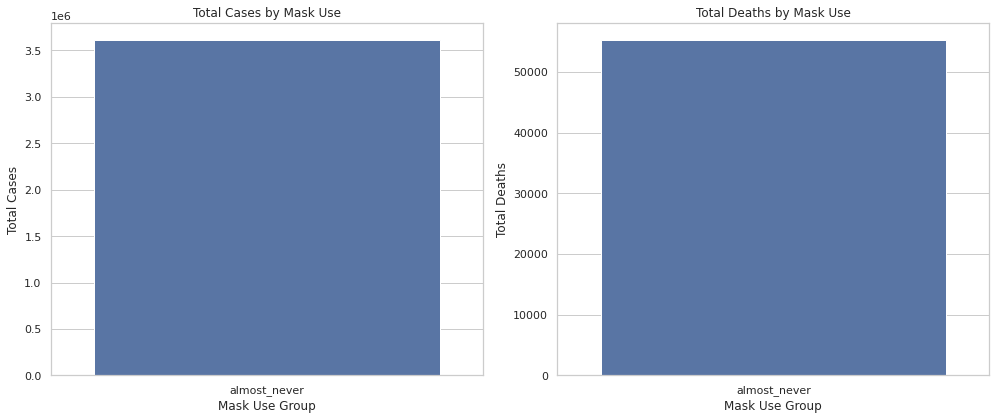

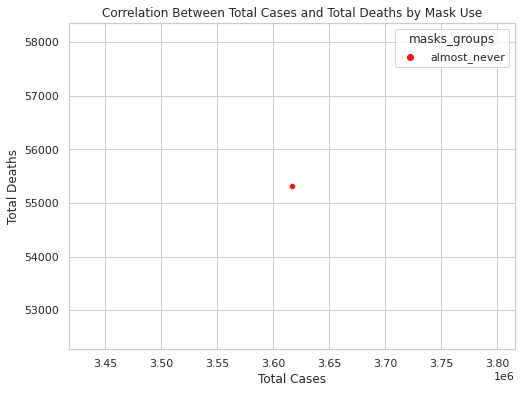

In [0]:
# For the state selected above, how would you visualize the mask use? Using one or more visualizations, explore the data 
# to try and find a correlation between mask use and the number of cases/deaths.
from pyspark.sql import functions as F

# Group by mask use and aggregate the total number of cases and deaths
aggregated_data = filtered_df.groupBy("masks_groups").agg(
    F.sum("cases").alias("total_cases"),
    F.sum("deaths").alias("total_deaths")
)

# Show the aggregated data
aggregated_data.show()
# Convert the aggregated Spark DataFrame to a Pandas DataFrame
aggregated_data_pd = aggregated_data.toPandas()

# Show the first few rows of the DataFrame
aggregated_data_pd.head()
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for Seaborn
sns.set(style="whitegrid")

# Create a figure with two subplots: one for cases and one for deaths
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot Total Cases by Mask Use
sns.barplot(x="masks_groups", y="total_cases", data=aggregated_data_pd, ax=ax[0])
ax[0].set_title("Total Cases by Mask Use")
ax[0].set_xlabel("Mask Use Group")
ax[0].set_ylabel("Total Cases")

# Plot Total Deaths by Mask Use
sns.barplot(x="masks_groups", y="total_deaths", data=aggregated_data_pd, ax=ax[1])
ax[1].set_title("Total Deaths by Mask Use")
ax[1].set_xlabel("Mask Use Group")
ax[1].set_ylabel("Total Deaths")

# Show the plot
plt.tight_layout()
plt.show()
# Create a scatter plot to visualize the relationship between cases and deaths by mask use
plt.figure(figsize=(8, 6))
sns.scatterplot(x="total_cases", y="total_deaths", hue="masks_groups", data=aggregated_data_pd, palette="Set1")
plt.title("Correlation Between Total Cases and Total Deaths by Mask Use")
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.show()




In [0]:
# Save mask_use as a Parquet file in directory "output/"
# Save the DataFrame as a Parquet file in the "output/" directory
joined_df.write.parquet("output/mask_use.parquet")



In [0]:
# Display the saved file and note how it is saved.
# Read the Parquet file back into a DataFrame
# Read the Parquet file back into a DataFrame
parquet_df = spark.read.parquet("dbfs:/output/mask_use.parquet")

# Display the content of the Parquet file
parquet_df.display()

# Check the schema of the Parquet file to inspect its structure
parquet_df.printSchema()



COUNTYFP NEVER RARELY SOMETIMES FREQUENTLY ALWAYS masks_groups date county state fips cases deaths confirmed_cases confirmed_deaths probable_cases probable_deaths 1001 0.053 0.074 0.134 0.295 0.444 almost_never 2021-03-12 Autauga Alabama 1001 6409 95 5523 85 886 10 1003 0.083 0.059 0.098 0.323 0.436 almost_never 2021-03-12 Baldwin Alabama 1003 20072 294 14228 220 5844 74 1005 0.067 0.121 0.12 0.201 0.491 almost_never 2021-03-12 Barbour Alabama 1005 2175 52 1217 35 958 17 1007 0.02 0.034 0.096 0.278 0.572 almost_never 2021-03-12 Bibb Alabama 1007 2475 58 2009 34 466 24 1009 0.053 0.114 0.18 0.194 0.459 almost_never 2021-03-12 Blount Alabama 1009 6282 129 4835 109 1447 20 1011 0.031 0.04 0.144 0.286 0.5 almost_never 2021-03-12 Bullock Alabama 1011 1183 39 1057 29 126 10 1013 0.102 0.053 0.257 0.137 0.451 almost_never 2021-03-12 Butler Alabama 1013 2037 66 1858 60 179 6 1015 0.152 0.108 0.13 0.167 0.442 almost_never 2021-03-12 Calhoun Alabama 1015 14034 299 10551 240 3483 59 1017 0.117 0.037 0.15 0.136 0.56 almost_never 2021-03-12 Chambers Alabama 1017 3439 112 1711 72 1728 40 1019 0.135 0.027 0.161 0.158 0.52 almost_never 2021-03-12 Cherokee Alabama 1019 1787 42 1152 32 635 10 1021 0.06 0.07 0.058 0.194 0.618 almost_never 2021-03-12 Chilton Alabama 1021 3945 105 3272 79 673 26 1023 0.049 0.038 0.126 0.219 0.568 almost_never 2021-03-12 Choctaw Alabama 1023 569 23 493 13 76 10 1025 0.049 0.088 0.164 0.268 0.43 almost_never 2021-03-12 Clarke Alabama 1025 3460 55 2438 40 1022 15 1027 0.148 0.158 0.195 0.169 0.329 almost_never 2021-03-12 Clay Alabama 1027 1467 54 1163 48 304 6 1029 0.151 0.125 0.138 0.217 0.368 almost_never 2021-03-12 Cleburne Alabama 1029 1410 41 1270 33 140 8 1031 0.101 0.152 0.094 0.186 0.466 almost_never 2021-03-12 Coffee Alabama 1031 5286 104 3484 44 1802 60 1033 0.082 0.096 0.152 0.159 0.51 almost_never 2021-03-12 Colbert Alabama 1033 6027 125 4355 105 1672 20 1035 0.099 0.052 0.259 0.192 0.399 almost_never 2021-03-12 Conecuh Alabama 1035 1074 24 814 23 260 1 1037 0.055 0.131 0.167 0.263 0.384 almost_never 2021-03-12 Coosa Alabama 1037 911 24 540 21 371 3 1039 0.187 0.128 0.129 0.201 0.356 almost_never 2021-03-12 Covington Alabama 1039 4007 108 1971 73 2036 35 1041 0.06 0.091 0.199 0.233 0.416 almost_never 2021-03-12 Crenshaw Alabama 1041 1484 55 1093 47 391 8 1043 0.13 0.024 0.249 0.217 0.379 almost_never 2021-03-12 Cullman Alabama 1043 9054 183 6205 120 2849 63 1045 0.089 0.113 0.118 0.22 0.46 almost_never 2021-03-12 Dale Alabama 1045 4701 108 3121 86 1580 22 1047 0.095 0.1 0.159 0.122 0.524 almost_never 2021-03-12 Dallas Alabama 1047 3443 142 2607 99 836 43 1049 0.084 0.051 0.106 0.179 0.58 almost_never 2021-03-12 DeKalb Alabama 1049 8555 178 7364 147 1191 31 1051 0.042 0.095 0.127 0.252 0.485 almost_never 2021-03-12 Elmore Alabama 1051 9625 194 7127 157 2498 37 1053 0.114 0.026 0.188 0.285 0.387 almost_never 2021-03-12 Escambia Alabama 1053 3807 73 2231 53 1576 20 1055 0.096 0.103 0.178 0.122 0.501 almost_never 2021-03-12 Etowah Alabama 1055 13470 335 10655 274 2815 61 1057 0.138 0.048 0.151 0.233 0.429 almost_never 2021-03-12 Fayette Alabama 1057 2032 58 1648 42 384 16 1059 0.065 0.071 0.223 0.156 0.484 almost_never 2021-03-12 Franklin Alabama 1059 4048 82 3384 68 664 14 1061 0.176 0.131 0.089 0.158 0.445 almost_never 2021-03-12 Geneva Alabama 1061 2415 71 1518 35 897 36 1063 0.03 0.053 0.127 0.167 0.623 almost_never 2021-03-12 Greene Alabama 1063 887 32 744 24 143 8 1065 0.026 0.061 0.084 0.191 0.639 almost_never 2021-03-12 Hale Alabama 1065 2130 72 1629 60 501 12 1067 0.066 0.068 0.17 0.258 0.438 almost_never 2021-03-12 Henry Alabama 1067 1840 41 1050 25 790 16 1069 0.085 0.079 0.135 0.268 0.433 almost_never 2021-03-12 Houston Alabama 1069 10189 266 5491 161 4698 105 1071 0.092 0.089 0.11 0.249 0.46 almost_never 2021-03-12 Jackson Alabama 1071 6570 105 5536 78 1034 27 1073 0.049 0.037 0.107 0.179 0.628 almost_never 2021-03-12 Jefferson Alabama 1073 72571 1418 65389 1139 7182 279 1075 0.107 0.045 0.132 0.

root
 |-- COUNTYFP: integer (nullable = true)
 |-- NEVER: double (nullable = true)
 |-- RARELY: double (nullable = true)
 |-- SOMETIMES: double (nullable = true)
 |-- FREQUENTLY: double (nullable = true)
 |-- ALWAYS: double (nullable = true)
 |-- masks_groups: string (nullable = true)
 |-- date: date (nullable = true)
 |-- county: string (nullable = true)
 |-- state: string (nullable = true)
 |-- fips: integer (nullable = true)
 |-- cases: integer (nullable = true)
 |-- deaths: integer (nullable = true)
 |-- confirmed_cases: integer (nullable = true)
 |-- confirmed_deaths: integer (nullable = true)
 |-- probable_cases: integer (nullable = true)
 |-- probable_deaths: integer (nullable = true)



In [0]:
# On how many partitions is this file partitioned: dbfs:/databricks-datasets/COVID/covid-19-data/mask-use/mask-use-by-county.csv?
# Read the CSV file into a DataFrame
mask_use_df = spark.read.csv("dbfs:/databricks-datasets/COVID/covid-19-data/mask-use/mask-use-by-county.csv", header=True, inferSchema=True)

# Check the number of partitions
num_partitions = mask_use_df.rdd.getNumPartitions()

# Print the number of partitions
print(f"The file is partitioned into {num_partitions} partitions.")


The file is partitioned into 1 partitions.


Re-do at least one excercise in SQL. (First you need to register the data as a table.)

In [0]:
# Load the CSV file into a DataFrame
mask_use_df = spark.read.csv("dbfs:/databricks-datasets/COVID/covid-19-data/mask-use/mask-use-by-county.csv", header=True, inferSchema=True)

# Register the DataFrame as a temporary SQL table
mask_use_df.createOrReplaceTempView("mask_use_table")

# Run an SQL query to count counties by mask use categories
sql_query = """
SELECT
  NEVER,
  RARELY,
  SOMETIMES,
  FREQUENTLY,
  ALWAYS,
  COUNT(*) AS num_counties
FROM mask_use_table
GROUP BY NEVER, RARELY, SOMETIMES, FREQUENTLY, ALWAYS
"""

# Execute the SQL query and display the result
result_df = spark.sql(sql_query)

# Display the result
result_df.show()  # Use .show() in place of .display() for regular Spark SQL


+-----+------+---------+----------+------+------------+
|NEVER|RARELY|SOMETIMES|FREQUENTLY|ALWAYS|num_counties|
+-----+------+---------+----------+------+------------+
|0.135| 0.027|    0.161|     0.158|  0.52|           1|
|0.042|  0.05|    0.049|     0.196| 0.663|           1|
|0.034| 0.072|    0.076|     0.175| 0.644|           1|
|0.215|  0.05|    0.123|     0.143|  0.47|           1|
|0.066| 0.088|    0.122|     0.227| 0.496|           1|
|0.103|  0.08|     0.19|     0.187| 0.441|           1|
|0.061|  0.05|    0.295|     0.282| 0.312|           1|
|0.046| 0.082|    0.074|     0.144| 0.654|           1|
|0.016| 0.074|    0.125|     0.245|  0.54|           1|
|0.008| 0.078|    0.129|     0.281| 0.505|           1|
| 0.04| 0.175|    0.172|      0.38| 0.233|           1|
|0.038| 0.111|    0.189|     0.197| 0.465|           1|
|0.026| 0.071|    0.072|     0.225| 0.606|           1|
|0.099| 0.026|    0.271|     0.283|  0.32|           1|
|0.017| 0.097|    0.064|     0.154| 0.668|      

## Where to go from here...

If you finished early or you want to practice more, you can do the following:
- read chapter 4 of [Learning Spark 2.0](https://pages.databricks.com/rs/094-YMS-629/images/LearningSpark2.0.pdf)
- the counties dataset used for this exercise only showed data for a single day. Repeat the notebook using the full dataset.  
- pick another dataset from `dbfs:/databricks-datasets/` that interests you and explore. 
- upload an external dataset of your choosing and explore. 
- look at the `airlines` dataset and answer some questions:
  - Only work with first 100 files, otherwise it will be too much for the VM (.csv('/databricks-datasets/airlines/part-000*'))
  - The span of the dataset (first and last date)
  - How many different flights are in the dataset (FlightNum)?
  - Which one has the most delays on arrival (ArrDelay)?
  - What is the % of cancelled flights (Cancelled)?
  - Which carrier did the longest distance each year (UniqueCarrier, Distance)?
  - How is the traffic changing over years?
- install `Koalas` library and try it out: https://koalas.readthedocs.io/en/latest/index.html